# 🪃 **Práctica 07: Regresión Logística** 📟
----

## <b>T</b><b>e</b><b>a</b><b>m</b>: <font color='red'><b>S</b></font><b>ocios</b> <font color='blue'><b>I</b></font><b>nteligentemente</b> <font color='green'><b>A</b></font><b>rtificiales</b> (<font color='red'><b>S</b></font>.<font color='blue'><b>I</b></font>.<font color='green'><b>A</b></font>)

<font color='yellow'>▼</font> **Araujo Chávez Mauricio**

<font color='blue'>♥</font> **Bonilla Reyes Dafne**

<font color='red'>♦</font> **Castañón Maldonado Carlos Emilio**

<span style="color:#3498DB">❖</span> **Clemente Herrera Karla**

<font color='purple'>♠</font> **Mares Cruz Tlacaelel Horacio**

<font color='green'>♣</font> **Navarro Santana Pablo César**

In [ ]:
# En caso de no tener instalado lo anterior, instalar con:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install -U scikit-learn

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn as sk
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib inline

### **Cargamos los datos**

In [3]:
path = './data/cd_Abandono_Escolar_CONALEP_2023.csv'

### **Leemos los datos del CSV**

In [6]:
# Leemos el archivo
pd.read_csv(path, encoding='latin-1')

,cve_ent,entidad,cve_plantel,plantel,periodo_anual,Porcentaje_de_abandono_escolar
0,1.0,Aguascalientes,63.0,Aguascalientes II,2022-2023,8.5
1,1.0,Aguascalientes,284.0,Aguascalientes III,2022-2023,13.9
2,1.0,Aguascalientes,318.0,Aguascalientes IV,2022-2023,9.1
3,1.0,Aguascalientes,247.0,Ing. Miguel Ángel Barberena Vega,2022-2023,9.1
4,1.0,Aguascalientes,319.0,Pabellon de Arteaga,2022-2023,12.6
...,...,...,...,...,...,...
310,32.0,Zacatecas,137.0,Fresnillo,2022-2023,23.2
311,32.0,Zacatecas,136.0,Maestra Dolores Castro Varela,2022-2023,14.3
312,32.0,Zacatecas,326.0,Mazapil,2022-2023,21.0
313,NaN,NaN,NaN,NaN,NaN,NaN


### **Creamos un Data Frame del CSV**

In [7]:
escolar_DataFrame = pd.read_csv(path, encoding='latin-1')

### **Obtenemos los tipos de Datos del CSV**

In [8]:
escolar_DataFrame.dtypes

cve_ent                           float64
entidad                            object
cve_plantel                       float64
plantel                            object
periodo_anual                      object
Porcentaje_de_abandono_escolar    float64
dtype: object

### **Visualizamos las columnas del CSV**

In [9]:
escolar_DataFrame.columns

Index(['cve_ent', 'entidad', 'cve_plantel', 'plantel', 'periodo_anual',
       'Porcentaje_de_abandono_escolar'],
      dtype='object')

### **Ejemplo de la obtencion de Datos de alguna de las columnas del CSV**

In [10]:
# Probamos nuestro ejemplo con la columna 'entidad'
pd.unique(escolar_DataFrame['entidad'])

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro de Arteaga', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz Llave', 'Yucatán', 'Zacatecas', nan, 'CONALEP'],
      dtype=object)

In [11]:
# Probamos otro ejemplo con la columna 'Porcentaje_de_abandono_escolar'
pd.unique(escolar_DataFrame['Porcentaje_de_abandono_escolar'])

array([ 8.5, 13.9,  9.1, 12.6, 17.6, 10. , 20.2, 22.6, 19. , 20. , 12.5,
       18.7, 20.5,  8.6, 18.8, 11.4, 17.5, 12.2, 15.6, 12.8, 18.9, 10.9,
       30.9, 16.2, 23.1, 20.9, 25.4, 29.2, 17.4, 31.7, 20.1, 15. , 19.9,
       21.1, 17. , 23. , 32.3, 23.3, 28.4, 25.3, 36.9, 27.8, 37.4, 24. ,
       30.6, 19.7, 18.3, 25.6, 21.3, 29.9, 19.6, 25.9, 28.7, 21.6, 27.4,
        7.3,  7.1,  9.5,  8.3,  5.3, 10.6,  7.5, 14.5,  8.7, 15.1, 24.9,
       26.5, 31.4, 11.9, 15.3, 14.7,  9.4, 12.1,  9.9,  7.7, 13.8, 16.6,
       10.7, 13.5, 13.6, 12.7, 11.2, 11.8, 13.3, 10.2, 14.2, 24.6, 16.5,
       20.3, 15.7, 29.7,  8.4, 14. , 11.5, 11.7, 13. ,  9.2, 19.2, 10.3,
        6.9,  7.2,  7.9, 11.1, 11. ,  9.8, 10.1, 12.9, 10.4,  9.3,  5.2,
        4.8, 10.8,  5.4, 18.2,  7. ,  7.4, 13.7,  9.7,  6.3, 14.6, 17.2,
       22.8, 23.2, 15.8, 21.9, 18.6, 15.9, 17.8, 15.2, 22.4, 20.7, 18.4,
       14.4,  8.8, 14.3, 22.1, 16.9,  4.2, 14.9,  4.5,  6.6, 16. ,  6.5,
        8. , 19.3, 13.4,  8.9,  3.6, 10.5, 14.1, 25

### **Visualizamos el numero de planteles de Conalep en cada entidad**

In [17]:
escolar_DataFrame['entidad'].value_counts()

entidad
México                  39
Ciudad de México        27
Nuevo León              18
Jalisco                 18
Sinaloa                 16
Guanajuato              16
Veracruz Llave          15
Sonora                  14
Michoacán de Ocampo     13
Chiapas                 12
Guerrero                10
Puebla                  10
Coahuila de Zaragoza     9
Chihuahua                8
Tamaulipas               8
Quintana Roo             8
Aguascalientes           7
Tabasco                  7
Baja California          6
Hidalgo                  6
Yucatán                  5
San Luis Potosí          5
Morelos                  5
Querétaro de Arteaga     5
Oaxaca                   5
Nayarit                  4
Durango                  3
Colima                   3
Tlaxcala                 3
Campeche                 3
Zacatecas                3
Baja California Sur      2
CONALEP                  1
Name: count, dtype: int64

### **Obtenemos mas informacion con describe**

In [21]:
escolar_DataFrame['entidad'].describe()

count        314
unique        33
top       México
freq          39
Name: entidad, dtype: object

## **Visualización y análisis de datos**

### **Visualizamos las entidades y su indice de abandono**

<Axes: xlabel='entidad', ylabel='Indice de Abandono'>

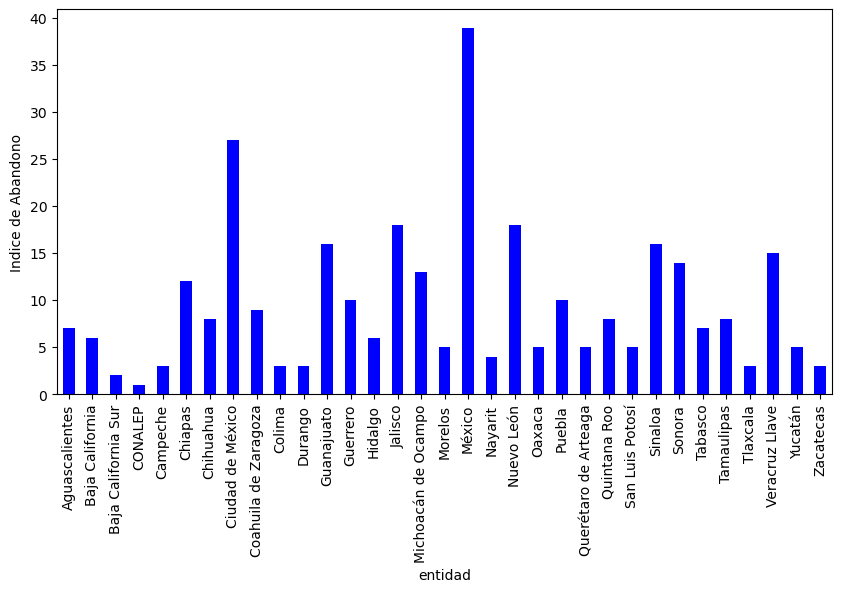

In [20]:
# Contamos el indice de abandono escolar por entidad
conteo_Entidades_IndiceA = escolar_DataFrame.groupby('entidad')['Porcentaje_de_abandono_escolar'].count()

# Graficamos Usando Matplotlib
conteo_Entidades_IndiceA.plot(kind='bar', figsize=(10, 5), color='blue', ylabel='Indice de Abandono' ) 

### **Agrupamiento de Datos**

<Axes: xlabel='entidad,plantel', ylabel='Indice de Abandono'>

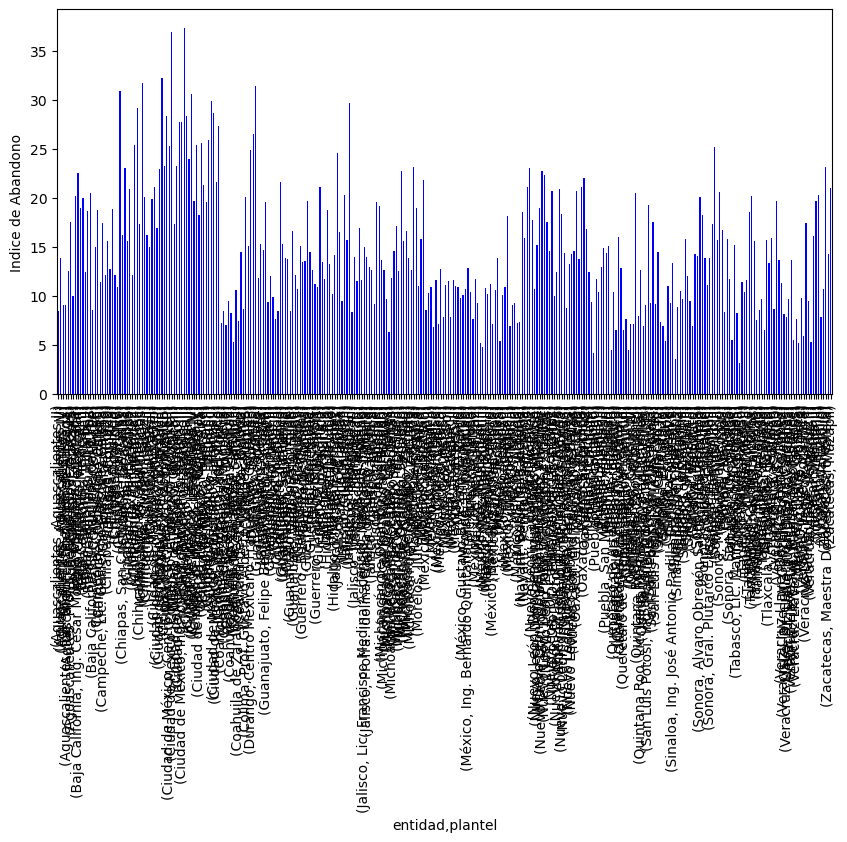

In [22]:
# Agrupamos los datos, primero por entidad y luego por plantel, calculando el promedio de abondono escolar por entidad.

conteo_Entidades_IndiceA = escolar_DataFrame.groupby(['entidad', 'plantel'])['Porcentaje_de_abandono_escolar'].mean()

# Graficamos Usando Matplotlib
conteo_Entidades_IndiceA.plot(kind='bar', figsize=(10, 5), color='blue', ylabel='Indice de Abandono' )